# Project: Cluster Modeling 

# Problem:
This is a workflow for building a cluster model. With comments that are to illustrate what we have understood from each step.

# Step 1. a. Define Business Problem and Machine Learning Problem
The data that we have is for predicting if the person is prone to hard disease or not so that he could seek health treatment. We have 11 attributes(Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope) that have multipule criteria, that we will use to predict the pacients health status. We will use Usupervised learning

In [120]:
conda install -c plotly plotly

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold
from sklearn.metrics import silhouette_score





import plotly.express as px
import pandas as pd

#  b. Data Information and Descriptive Statistics 

In [3]:
df = pd.read_csv('heart.csv')
               

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [124]:
df.head(10000)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Step 2. Feature Engineering and Pre-Scale Dataset


In [6]:
df = pd.get_dummies(df)
df.head(10000)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


# Step 3. Generate Scatter Plot 

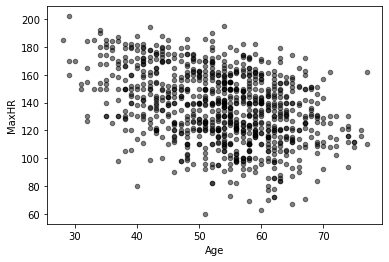

In [7]:
colors = np.random.rand(50)
ax1 = df.plot.scatter(x='Age',y='MaxHR',c='Black',alpha=0.5)


In [278]:
from sklearn.cluster import KMeans

In [317]:
b = pd.concat([df.iloc[:, np.r_[0:1,4:5]]])

display(b)

,Age,MaxHR
0,40,172
1,49,156
2,37,98
3,48,108
4,54,122
...,...,...
913,45,132
914,68,141
915,57,115
916,57,174


# Step 4. Build Clustering Model


In [326]:
kmeans = KMeans(n_clusters = 3, random_state=2023)
kmeans.fit(b)

KMeans(n_clusters=3, random_state=2023)

In [327]:
ident_clusters = kmeans.fit_predict(b)

Text(0.5, 0, 'Maximum Heart Rate')

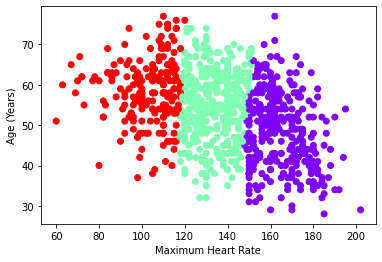

In [328]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = ident_clusters
plt.scatter(data_with_clusters['MaxHR'],data_with_clusters['Age'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.ylabel('Age (Years)')
plt.xlabel('Maximum Heart Rate')

In [329]:
# Calculate Silhoutte Score
#
score = silhouette_score(df, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.009


We identify that the Silhoutter Score is close to zero, which means it is overlapping, and even when increasing the K-means the 
score become below 0, which means the clusters are prone to be wrong/incorrect.

# Step 5. Another Clustering Model



In [350]:
from sklearn.cluster import DBSCAN
DB_scan = DBSCAN(eps=1, min_samples=1)

model = DB_scan.fit(b)
model2 = DB_scan.fit_predict(b)


Text(0.5, 0, 'Maximum Heart Rate')

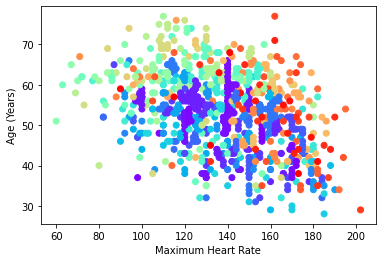

In [351]:
data_with_clusters2 = df.copy()
data_with_clusters2['Clusters'] = model2
plt.scatter(data_with_clusters2['MaxHR'],data_with_clusters2['Age'],c=data_with_clusters2['Clusters'],cmap='rainbow')
plt.ylabel('Age (Years)')
plt.xlabel('Maximum Heart Rate')

In [353]:
from sklearn.metrics import silhouette_score
# Calculate Silhoutte Score
#
score = silhouette_score(df, model.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: -0.594
